![logo](images/untumbes.PNG)

<center><b>Prof. Dr. Jorge Zavaleta - zavaleta.jorge@gmail.com</b></center>

## Algoritmo de Clasificación

In [1]:
# librarys
import numpy as np                          # calculo cientifico
import pandas as pd                         # manejo de dataframes
# graphics
import matplotlib.pyplot as plt             # visualizacion grafica
import seaborn as sns                       # visualizacion grafica
#
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# analise de resultado - metricas
#from sklearn.metrics import plot_confusion_matrix #deprecated
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
#Modelagem com AI
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
#
#import shap
# path
import os.path
# warnings
import warnings
warnings.filterwarnings("ignore")

>## Lectura del dataset

In [2]:
# paths
path_dataset ='data/'    # diretorio do dataset local
# dataset read
file_name='curados_obitos_final.csv'          # nome do dataset
data = pd.read_csv(path_dataset+file_name,sep=';',encoding='utf-8',low_memory=False) #index_col=0  #encoding='ISO-8859-1','latin-1')     # leitura do dataset
data.head()

,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,82,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


>## Funciones y procedimientos auxiliares

In [3]:
# create/write text file
def write_file_text(filename,text):
    #file exist
    file_exist = os.path.isfile(filename)
    if file_exist == False:
        with open(filename,'w') as file:
            file.write(text+'\n')
            file.write('------------------------------\n')
    else:
        with open(filename,'a') as file:
            file.write(text)

In [4]:
# Display confusion matrix
def display_cm(cm,class_names,title,fig_name):
    disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
    fig,ax = plt.subplots(figsize=(8,8))
    disp.plot(ax=ax,cmap='Blues') #, xticks_rotation='vertical')
    disp.ax_.set_title(title)
    #plt.xlabel('Predicted')
    #plt.ylabel('True')
    plt.show()
    fig.savefig('metricas/'+fig_name+'.png')

In [5]:
# plot roc curve
def plot_roc_curve(fpr,tpr,roc_auc,fig_name):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(fpr, tpr, color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    fig.savefig('metricas/'+fig_name+'.png')

In [6]:
# construir as distribuições - notebook kaggle - KAIKE WESLEY REIS
def construir_distribuicoes(data,variaveis, objetivo=None, usar_objetivo=False):
    # Definindo figura para construir gráficos
    fig, axes = plt.subplots(nrows=int(len(variaveis)/2+1), ncols=2, figsize=(12,30))
    
    # Indexadores
    r = 0      # Linha
    c = 0      # Coluna

    # Loop em todas as variaveis
    for v in variaveis:
        # Realizar gráfico de distribuicao
        if usar_objetivo is False:
            sns.kdeplot(data[v], shade=True, color='#50c878', ax=axes[r][c])
        else:
            sns.kdeplot(data.loc[data[objetivo] == 0, v], shade=True, color='#386796', ax=axes[r][c], label='Óbito')
            sns.kdeplot(data.loc[data[objetivo] == 1, v], shade=True, color='#F06C61', ax=axes[r][c], label='Cura')
            # Gerar legenda
            axes[r][c].legend(title=objetivo)
            pass
        
        # Aplicar configuracao do gráfico - gerais
        axes[r][c].set_title('Variável - ' + v)   
        axes[r][c].set_xlabel('')
        
        # Controle dos indexadores
        c += 1
        if c > 1:
            c = 0
            r += 1
    # gravar os graficos
    if usar_objetivo == False:
        fig.savefig('metricas/distribuicao_covid_19.png')
    else:
        fig.savefig('metricas/estratificacao_covid_19.png')
    # Configuracao básica de gráfico
    plt.tight_layout()

In [7]:
# construir as distribuições - notebook kaggle - KAIKE WESLEY REIS
def construir_distribuicoes(data,variaveis, objetivo=None, usar_objetivo=False):
    # Definindo figura para construir gráficos
    fig, axes = plt.subplots(nrows=int(len(variaveis)/2+1), ncols=2, figsize=(12,30))
    
    # Indexadores
    r = 0      # Linha
    c = 0      # Coluna

    # Loop em todas as variaveis
    for v in variaveis:
        # Realizar gráfico de distribuicao
        if usar_objetivo is False:
            sns.kdeplot(data[v], shade=True, color='#50c878', ax=axes[r][c])
        else:
            sns.kdeplot(data.loc[data[objetivo] == 0, v], shade=True, color='#386796', ax=axes[r][c], label='Óbito')
            sns.kdeplot(data.loc[data[objetivo] == 1, v], shade=True, color='#F06C61', ax=axes[r][c], label='Cura')
            # Gerar legenda
            axes[r][c].legend(title=objetivo)
            pass
        
        # Aplicar configuracao do gráfico - gerais
        axes[r][c].set_title('Variável - ' + v)   
        axes[r][c].set_xlabel('')
        
        # Controle dos indexadores
        c += 1
        if c > 1:
            c = 0
            r += 1
    # gravar os graficos
    if usar_objetivo == False:
        fig.savefig('metricas/distribuicao_covid_19.png')
    else:
        fig.savefig('metricas/estratificacao_covid_19.png')
    # Configuracao básica de gráfico
    plt.tight_layout()

In [8]:
## spearman correlation
# spearman correlationrafic
def calcular_correlacao_numerica(data,variaveis, corr_tipo='spearman'):
    return data[variaveis].corr(corr_tipo)
#
def plot_mapa_calor_corr(corr_matrix, titulo):    
    # Fazer mascara para evitar correlação espelho
    mascara = np.triu(corr_matrix)
    # Fazer go
    plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
    sns.heatmap(corr_matrix, annot = True, mask=mascara, fmt='.2f', vmin=-1, vmax=1)
    #plt.xticks(rotation=60)
    plt.title(titulo, fontsize=25, fontweight='bold')
    plt.tight_layout()    

In [9]:
# avaliação de métricas
def evaluate_metrics(y, y_pred):
    #
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)
    #
    print(' Metricas da regresión')
    print(f" MAE: {mae:.2f}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R2: {r2:.2f}")

># Evaluación del modelo

>## Definición de las caracteristicas y el objetivo

In [10]:
# definição de grupos de variáveis (features) e objetivo
features = ['NU_IDADE_N', 'FEBRE', 'TOSSE', 'DISPNEIA', 'DESC_RESP','SATURACAO', 'VOMITO', 'FADIGA', 'OUTRO_SIN', 
            'FATOR_RISC', 'CARDIOPATI','ASMA', 'DIABETES', 'OUT_MORBI','VACINA_COV', 'UTI']
objetivo = 'EVOLUCAO'

>## Análisis exploratório de datos

In [11]:
#

>## División de los datos para entrenamiento y teste

In [12]:
# treino e teste: ok
#X = dados.iloc[:,0:21]
#y = dados.iloc[:,21]
# Definindo conjunto X e Y
X = data.drop(axis=1, columns=[objetivo]).copy()  # todas las columnas menos la columna ´EVOLUCAO´
y = data[objetivo].copy()     

In [13]:
# Fazendo a divisão estratificada 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y, random_state=0)

In [14]:
# Visualiza os dados de treinamento (X_train)
X_train.head()

,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI
32648,67,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0
4449,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0
28837,70,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,1.0,1.0,1.0
3478,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
11933,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0


>## Balanceamiento de los datos de entrenamiento y teste

In [15]:
# verificando balaceamento da variavel objetivo
y_train.value_counts()

1.0    11540
0.0    11539
Name: EVOLUCAO, dtype: int64

># Construcción del modelo

>## Naive Bayes

In [16]:
# model definition
def hiperparameters_nb_gridSearchCV(X_train,y_train, X_test, y_test, params, filename, name):
   
    # create a categorical Naive Bayes Model
    nb_model = CategoricalNB()
    #
    DTC_Grid = GridSearchCV(nb_model,param_grid=params, cv=5, 
                          scoring=['f1', 'accuracy', 'recall', 'roc_auc',  'precision'], 
                          refit='accuracy')
    
    # Fit the model to the training data
    DTC_NB = DTC_Grid.fit(X_train,y_train)

    # create file with information of the training data
    text0 ='File create by Jorge Zavaleta'
    write_file_text(filename,text0)

    # print the all results
    means1 = DTC_NB.cv_results_['mean_test_accuracy']
    means2 = DTC_NB.cv_results_['mean_test_precision']
    means3 = DTC_NB.cv_results_['mean_test_recall']
    means4 = DTC_NB.cv_results_['mean_test_f1']
    means5 = DTC_NB.cv_results_['mean_test_roc_auc']
    stds = DTC_NB.cv_results_['std_test_f1']
    # for
    for mean1,mean2,mean3,mean4,mean5,std,params in zip(means1,means2,means3,means4,means5,stds,DTC_NB.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean4, std * 2, params))
        write_file_text(filename,' Acurácia: %0.3f ' % mean1)
        write_file_text(filename,' Precision: %0.3f ' % mean2)
        write_file_text(filename,' Recall: %0.3f ' % mean3)
        write_file_text(filename,' F1-score: %0.3f ' % mean4)
        write_file_text(filename,' ROC_AUC: %0.3f ' % mean5)
        std = std*2
        write_file_text(filename,' desvio: (+/-%0.03f) ' % std)
        write_file_text(filename,' param: %s ' % params)
        write_file_text(filename,'\n')

    # Best parameters
    print('Best parameters found:\n', DTC_NB.best_params_)
    #
    write_file_text(filename,'Best parameters found: %s' % DTC_NB.best_params_)
    write_file_text(filename,'\n')

    # evaluate model performance
    #Y
    #y_true = y_test
    y_pred = DTC_NB.predict(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #
    print(' Naive Bayes - Results on the test set:')
    print(classification_report(y_test,y_pred))

    # Score method also evaluates accuracy for classification models.
    # accuracy
    acc = accuracy_score(y_test, y_pred,normalize=True)
    #precision
    precision = precision_score(y_test, y_pred)
    #fi-score
    f1 = f1_score(y_test, y_pred, average='micro') 
    #recall/sensitivity   	
    recall = recall_score(y_test, y_pred, average='weighted')
    #confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    # visualizar matriz de confusão
    #print(pd.DataFrame(confusion_matrix(y_test,y_pred, labels=np.unique(y_test)), index=['Óbito-0', 'Cura-1'], columns=['Predito-0', 'Predito-1']))

    print()
    # print the scores
    print(" Accuracy:", acc)
    print(" Precision:", precision)
    print(" Recall/Sensitivity:", recall)    
    print(" F1-score:", f1)
    print(" cm:\n", cm)

    #write scores in the file text
    write_file_text(filename,' \nTraining Accuracy : {:.3f}'.format(DTC_NB.score(X_train, y_train)))
    write_file_text(filename,' \nTest Accuracy : {:.3f}'.format(DTC_NB.score(X_test,y_test))+'\n\n')
    #
    write_file_text(filename,' Classification Report of Naive Bayes:\n')
    write_file_text(filename, classification_report(y_test,y_pred)+"\n")
    write_file_text(filename,' Resultado do test set:\n')
    write_file_text(filename,'\n Accuracy: %0.03f' % acc)
    write_file_text(filename,'\n Precision: %0.03f' % precision)
    write_file_text(filename,'\n Recall: %0.03f' % recall)
    write_file_text(filename,'\n F1-score: %0.03f\n' % f1)
    write_file_text(filename,'\n Matriz de confusao:\n')
    write_file_text(filename,' %0.03f ' % cm[0][0])
    write_file_text(filename,' %0.03f \n' % cm[0][1])
    write_file_text(filename,' %0.03f ' % cm[1][0])
    write_file_text(filename,' %0.03f ' % cm[1][1])
    write_file_text(filename,'\n\n')
    #
    print()
    #
    class_names=[]
    class_names.append("Óbito")
    class_names.append("Cura")
    #
    # plot the confusion matrix, without normalization
    title1 = "Confusion matrix, without normalization"
    print('Graphic of the '+title1)
    #
    fig_name1 = 'data_nb_matriz_confusao'
    display_cm(cm,class_names,title1,fig_name1)
    
    # Normalized confusion matrix
    title2 = 'Normalized confusion matrix'
    cm_normalized = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    #
    print(title2+'\n')
    print(' %0.03f ' % cm_normalized[0][0],' %0.03f ' % cm_normalized[0][1])
    #print('%0.03f ' % cm_normalized[0][1])
    print(' %0.03f ' % cm_normalized[1][0],' %0.03f ' % cm_normalized[1][1])
    #print(' %0.03f ' % cm_normalized[1][1])
    print('\n')
    # write file
    write_file_text(filename,title2+'\n')
    write_file_text(filename,' %0.03f ' % cm_normalized[0][0])
    write_file_text(filename,' %0.03f \n' % cm_normalized[0][1])
    write_file_text(filename,' %0.03f ' % cm_normalized[1][0])
    write_file_text(filename,' %0.03f ' % cm_normalized[1][1])
    write_file_text(filename,'\n\n')
    #
    print(' Graphic of the '+title2)
    #
    fig_name2 = 'data_nb_matriz_confusao_normalizada'
    display_cm(cm_normalized,class_names,title2,fig_name2)
    
    #
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _  = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #
    print(' ROC curve (area = %0.2f)' % roc_auc+'\n')
    write_file_text(filename,' ROC curve (area = %0.2f)' % roc_auc+'\n')
    #
    print(' Graphic of the ROC curve\n')
    #
    fig_name = 'data_nb_curva_roc'
    plot_roc_curve(fpr,tpr,roc_auc,fig_name)

    # Vamos calcular o resultado de probabilidade de predição do conjunto de treino
    y_pred_train_proba = DTC_NB.predict_proba(X_train)
    #
    # Vamos agora selecionar um resultado que previu como positivo
    print(' Probabilidad del modelo prever negativo -',100*y_pred_train_proba[3][0].round(2),'%.')
    print(' Probabilidad del modelo prever positivo -',100*y_pred_train_proba[3][1].round(2),'%.')

    # Vamos calcular o resultado de probabilidade de predição do conjunto de treino
    y_pred_test_proba = DTC_NB.predict_proba(X_test)
    #
    # Vamos agora selecionar um resultado que previu como positivo
    print('Test - Probabilidad del modelo prever negativo -',100*y_pred_test_proba[3][0].round(2),'%.')
    print('test - Probabilidad del modelo prever positivo -',100*y_pred_test_proba[3][1].round(2),'%.')
    #
    print()
    print(' Evaluación de los valores de las métricas de NB:\n')
    evaluate_metrics(y_test, y_pred)

nan (+/-nan) for {'alpha': 0.0001}
nan (+/-nan) for {'alpha': 0.001}
nan (+/-nan) for {'alpha': 0.01}
nan (+/-nan) for {'alpha': 0.05}
nan (+/-nan) for {'alpha': 0.1}
nan (+/-nan) for {'alpha': 0.2}
nan (+/-nan) for {'alpha': 0.3}
nan (+/-nan) for {'alpha': 0.4}
nan (+/-nan) for {'alpha': 0.5}
nan (+/-nan) for {'alpha': 0.6}
nan (+/-nan) for {'alpha': 0.7}
nan (+/-nan) for {'alpha': 0.8}
nan (+/-nan) for {'alpha': 0.9}
nan (+/-nan) for {'alpha': 1.0}
nan (+/-nan) for {'alpha': 2.0}
nan (+/-nan) for {'alpha': 3.0}
nan (+/-nan) for {'alpha': 4.0}
nan (+/-nan) for {'alpha': 5.0}
nan (+/-nan) for {'alpha': 6.0}
nan (+/-nan) for {'alpha': 7.0}
nan (+/-nan) for {'alpha': 8.0}
nan (+/-nan) for {'alpha': 9.0}
nan (+/-nan) for {'alpha': 10.0}
nan (+/-nan) for {'alpha': 20}
nan (+/-nan) for {'alpha': 50}
nan (+/-nan) for {'alpha': 100}
nan (+/-nan) for {'alpha': 500}
nan (+/-nan) for {'alpha': 1000}
Best parameters found:
 {'alpha': 0.0001}
 Naive Bayes - Results on the test set:
              p

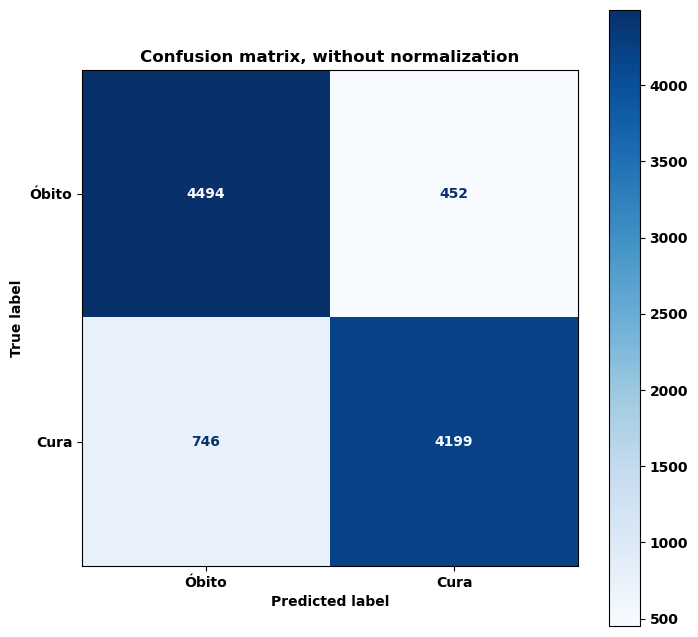

Normalized confusion matrix

 0.909   0.091 
 0.151   0.849 


 Graphic of the Normalized confusion matrix


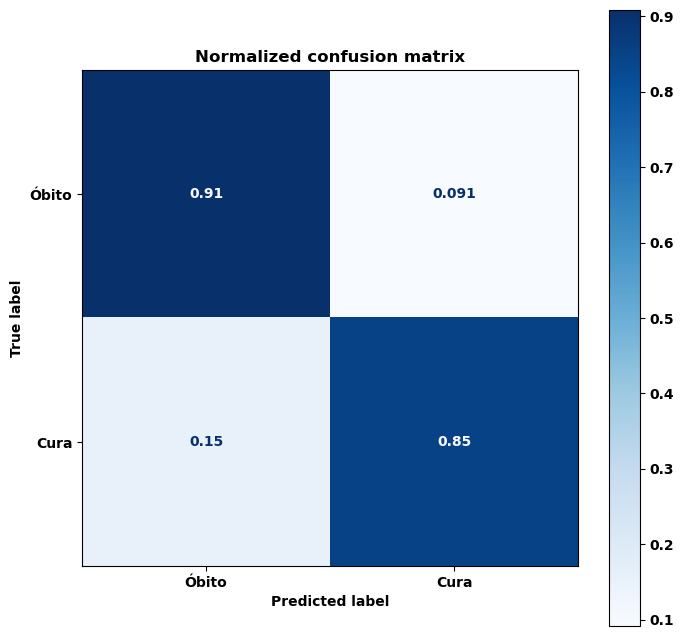

 ROC curve (area = 0.88)

 Graphic of the ROC curve



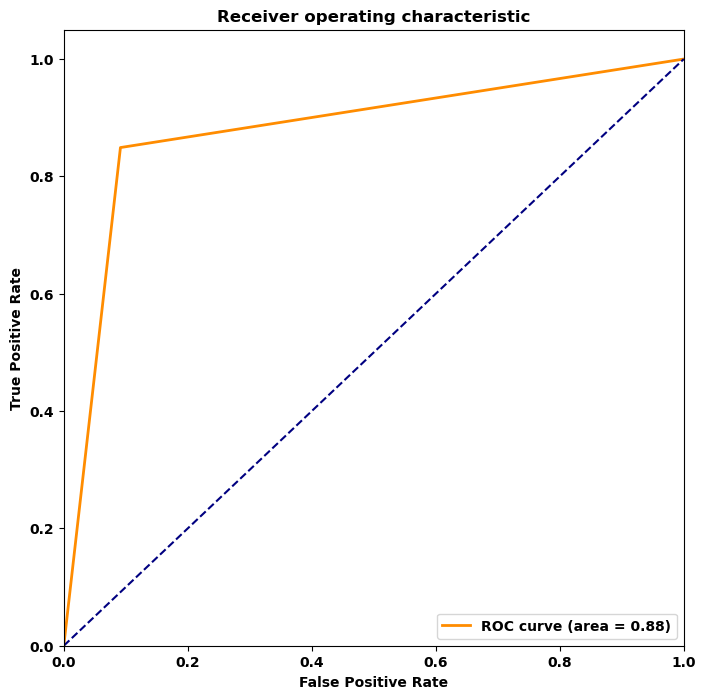

 Probabilidad del modelo prever negativo - 0.0 %.
 Probabilidad del modelo prever positivo - 100.0 %.
Test - Probabilidad del modelo prever negativo - 0.0 %.
test - Probabilidad del modelo prever positivo - 100.0 %.

 Evaluación de los valores de las métricas de NB:

 Metricas da regresión
 MAE: 0.12
 MSE: 0.12
 RMSE: 0.35
 R2: 0.52


In [17]:
# Naive Bayes Categorical
nb_name=['Naive Bayes Vacinas COVID-19']
nb_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                   10.0, 20, 50, 100, 500, 1000]}
#
nb_filename = 'metricas/data_nb.txt'
hiperparameters_nb_gridSearchCV(X_train,y_train, X_test, y_test, nb_params, nb_filename, nb_name)

<center><b>© Jorge Zavaleta, 2024</b></center>